#### 多层感知机

之前已经介绍过了线性回归和softmax回归在内的单层神经网络，然后深度学习主要学习多层模型，后续将以多层感知机(multilayer percetron,MLP),介绍多层神经网络的概念。

##### 隐藏层 

多层感知机在单层神经网络的基础上引入了一到多个隐藏层(hidden layer)。隐藏层位于输入层和输出层质检。下图展示了一个多层感知机的神经网络，它含有一个隐藏层，该层中有5个隐藏单元。

![](https://tva1.sinaimg.cn/large/006y8mN6gy1g8oe1n069gj30nc0bwjtg.jpg)
输入和输出个数为别为4和3，中间隐藏层中包含了5个隐藏单元。由于输入层不涉及计算，多层感知机的层数为2。隐藏层中的神经元和输入层各输入完全连接，输出层中的神经元和隐藏层中的各神经元也完全连接。因此多层感知机中的隐藏层和输出层都是全连接。

具体来说，给定一个小批量样本$X∈R^{nxd}$,其批量大小为n，输入个数为d。假设多层感知机只有一个隐含层，其中隐层单元个数为h。记隐藏层的输出为H，有$H∈R^{nxh}$，因为隐藏层和输出层均为全连接层，可以设隐藏层的权重参数和偏差参数为别为$W_{h}∈R^{dxh} 和b_{h}∈R^{1xh}$，输出层的权重和偏差参数分别为$ W_{o}∈R^{hxq}和b_{o}∈R^{1xq}$





我们先来看一种含单隐藏层的多层感知机的的设计，其输出$O∈R^{nxq}$的计算为

$$
\begin{aligned} \boldsymbol { H } & = \boldsymbol { X } \boldsymbol { W } _ { h } + \boldsymbol { b } _ { h } \\ \boldsymbol { O } & = \boldsymbol { H } \boldsymbol { W } _ { o } + \boldsymbol { b } _ { o } \end{aligned}
$$

也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个
$$
\boldsymbol { O } = \left( \boldsymbol { X } \boldsymbol { W } _ { h } + \boldsymbol { b } _ { h } \right) \boldsymbol { W } _ { o } + \boldsymbol { b } _ { o } = \boldsymbol { X } \boldsymbol { W } _ { h } \boldsymbol { W } _ { o } + \boldsymbol { b } _ { h } \boldsymbol { W } _ { o } + \boldsymbol { b } _ { o }
$$

从联立的公式中可以看出，虽然引入了隐藏层，却依然等价于一个单层神经网络：

其输出层权重参数为$W_{h}W_{o}$，偏差参数为$b_{h}W_{o}+b_{o}$，即便添加更多的隐藏层，以上设计依然可以与仅含输出层的单层神经网络等价。



##### 激活函数

使用隐藏变量使用按照元素运算的非线性函数进行变换，然后作为一个全连接层的输入。这个非线性函数进行转换叫作激活函数(activation function)

- ReLU函数
ReLu函数只保留正数元素，并将负数元素清零。为了直观的观察这一非线性变换，我可以先自己定义一个函数xyplot

In [1]:
%matplotlib inline
import torch
import numpy as  np
import matplotlib.pylab as plt
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l


In [2]:
def xyplot(x_vals,y_vals,name):
    d2l.set_figsize(figsize=(5,2.5))
    d2l.plt.plot(x_vals.detach().numpy(),y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name+'(x)')

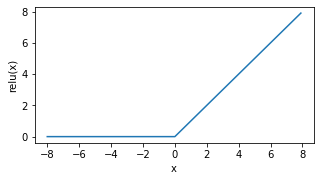

In [3]:
x = torch.arange(-8.0,8.0,0.1,requires_grad=True)
y= x.relu()
xyplot(x,y,'relu')

显然，当输入值为负数时，ReLU函数的导数为0，当输入为正数时，ReLU导数为1。
尽管输入为0时ReLu函数不可导，但是我们可以取此处的导数为0

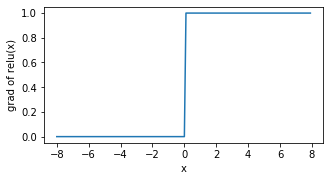

In [4]:
y.sum().backward()
xyplot(x,x.grad,'grad of relu')

- sigmoid函数
sigmoid函数可以将元素的值转变到0和1之间
sigmoid(x)   = $\frac{1}{1+exp(-x)}$

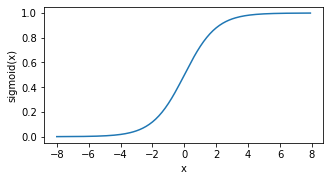

In [5]:
y = x.sigmoid()
xyplot(x,y,'sigmoid')

根据链式法则，$$sigmoid^{'}(x) = sigmoid(x)(1-sigmoid(x))$$
sigmoid函数的导数，当输入为0时，sigmoid函数的导数达到最大的0.25，当输入越偏离0时，simoid函数的导数越接近0。

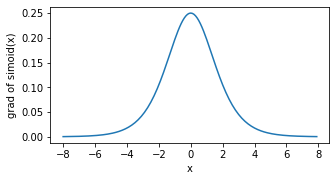

In [6]:
x.grad.zero_()
y.sum().backward()
xyplot(x,x.grad,'grad of simoid')

- tanh 函数
tanh函数(双曲正切)可以将元素的值变换到-1和1之间：
tanh(x) = $\frac{1-exp^{(-2x)}}{1+exp^{(-2x)}}$

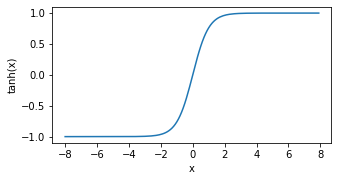

In [7]:
y = x.tanh()
xyplot(x,y,'tanh')

根据链式法则，tanh函数的导数
$tanh^{'}(x) = 1- tanh^{2}(x)$

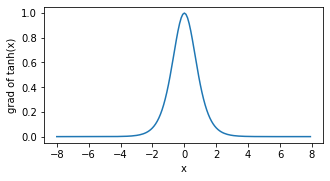

In [8]:
x.grad.zero_()
y.sum().backward()
xyplot(x,x.grad,'grad of tanh')

多层感知机就是含有至少一个隐藏层的由全连接组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各层隐藏层中隐藏单元个数都是超参数。以隐藏层为例并沿用本节之前定义的符号，多层感知机按一下方式计算输出：
$$
\begin{aligned} \boldsymbol { H } & = \phi \left( \boldsymbol { X } \boldsymbol { W } _ { h } + \boldsymbol { b } _ { h } \right) \\ \boldsymbol { O } & = \boldsymbol { H } \boldsymbol { W } _ { o } + \boldsymbol { b } _ { o } \end{aligned}
$$
其中，$\phi$表示激活函数。在分类问题中，我们可以输出$O$做softmax运算，并使用softmax回归中的交叉熵损失函数。在回归问题中，我们将输出层的输出个数设为1，并将输出O直接提供给线性回归中使用的平方损失函数。



##### 小结

- 多层感知机在输出层与输入层之间加入了一个或多个全连接隐藏层，并通过激活函数
对隐藏层输出进行变换
- 常用的激活函数包括ReLU函数，sigmoid函数，tanh函数